In [1]:
import os
import numpy as np

In [2]:
def load_npz_data(folder_path):
    data_list = []
    labels_list = []
    race_list = []  ### list to store race information
    
    for file in os.listdir(folder_path):
        if file.endswith(".npz"):
            data = np.load(os.path.join(folder_path, file))
            images_oct = data['oct_fundus']
            images_slo = data['slo_fundus']
            labels = data['glaucoma']
            race = data['race']  # Assuming 'race' key exists
            
            data_list.append((images_oct, images_slo))
            labels_list.append(labels)
            race_list.append(race)
    
    oct_images = np.vstack([d[0] for d in data_list]).reshape(-1, 224, 224)  #vstacking images and reshaping it to their original 2D size
    slo_images = np.vstack([d[1] for d in data_list]).reshape(-1, 224, 224)
    glaucoma_labels = np.hstack(labels_list)
    races = np.hstack(race_list) 
    
    return oct_images, slo_images, glaucoma_labels, races

In [3]:
# Load training and testing data, including race
train_oct, train_slo, train_glaucoma_labels, train_races = load_npz_data('C:\\Rakshya\\ULL\\First Semester\\Data Mining\\fairdomain-20241031T021302Z-001\\fairdomain\\Training')
test_oct, test_slo, test_glaucoma_labels, test_races = load_npz_data('C:\\Rakshya\\ULL\\First Semester\\Data Mining\\fairdomain-20241031T021302Z-001\\fairdomain\\Testing')


Validation

In [4]:
type(train_oct)

numpy.ndarray

In [5]:
print("Train OCT Images shape: ", train_oct.shape)
print("Train SLO Images shape: ", train_slo.shape)
print("Test OCT Images shape: ", test_oct.shape)
print("Test SLO Images shape: ", test_slo.shape)



Train OCT Images shape:  (3000, 224, 224)
Train SLO Images shape:  (3000, 224, 224)
Test OCT Images shape:  (2000, 224, 224)
Test SLO Images shape:  (2000, 224, 224)


In [6]:
print("Train OCT Images count: "+ str(train_oct.size))   #counts total pixel size
print("Train SLO Images count: "+ str(train_slo.size))  #counts total pixel size
print("Train Glaucoma labels count: "+ str(train_glaucoma_labels.size))
print("Train Races count: "+ str(train_races.size))
print("Test OCT Images count: "+ str(test_oct.size))   #counts total pixel size
print("Test SLO Images count: "+ str(test_slo.size))  #counts total pixel size
print("Test Glaucoma labels count: "+ str(test_glaucoma_labels.size))
print("Test Races count: "+ str(test_races.size))

Train OCT Images count: 150528000
Train SLO Images count: 150528000
Train Glaucoma labels count: 3000
Train Races count: 3000
Test OCT Images count: 100352000
Test SLO Images count: 100352000
Test Glaucoma labels count: 2000
Test Races count: 2000


In [7]:
train_oct[0]

array([[197, 182, 177, ..., 170, 152, 147],
       [193, 191, 189, ..., 146, 135, 138],
       [184, 191, 197, ..., 150, 149, 141],
       ...,
       [189, 185, 188, ..., 192, 186, 187],
       [192, 186, 185, ..., 200, 191, 191],
       [169, 195, 191, ..., 198, 189, 187]], dtype=uint8)

In [8]:
train_slo[0]

array([[25, 27, 20, ..., 20, 29, 11],
       [16, 26, 23, ..., 19, 14,  5],
       [21, 22, 23, ..., 14,  9, 11],
       ...,
       [22, 32, 39, ..., 11,  4, 10],
       [47, 35, 43, ..., 15,  5,  7],
       [25, 22, 32, ..., 11,  5, 14]], dtype=uint8)

In [9]:
test_oct

array([[[165, 173, 175, ..., 158, 156, 145],
        [170, 172, 170, ..., 156, 163, 160],
        [158, 169, 167, ..., 152, 151, 146],
        ...,
        [148, 147, 150, ..., 183, 192, 175],
        [138, 139, 143, ..., 184, 203, 186],
        [150, 137, 141, ..., 199, 203, 192]],

       [[148, 140, 154, ..., 204, 200, 194],
        [149, 142, 151, ..., 209, 204, 198],
        [141, 145, 142, ..., 201, 206, 201],
        ...,
        [177, 190, 178, ..., 157, 157, 160],
        [166, 185, 184, ..., 159, 159, 149],
        [168, 178, 181, ..., 171, 159, 156]],

       [[135, 147, 147, ..., 134, 131, 144],
        [134, 137, 137, ..., 148, 143, 154],
        [135, 138, 137, ..., 160, 147, 159],
        ...,
        [118, 129, 141, ..., 171, 180, 173],
        [121, 135, 135, ..., 169, 172, 175],
        [134, 135, 125, ..., 175, 166, 170]],

       ...,

       [[162, 173, 175, ..., 119, 119, 127],
        [168, 170, 177, ..., 124, 125, 125],
        [165, 175, 175, ..., 122, 122, 118

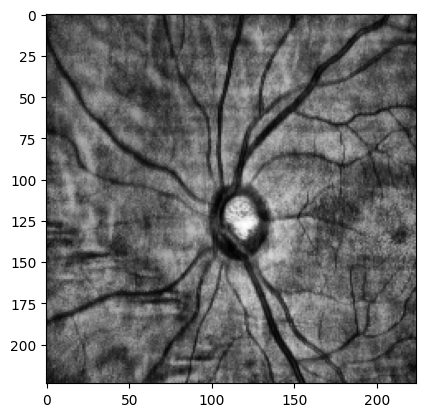

In [10]:
import matplotlib.pyplot as plt

plt.imshow(train_slo[1000], cmap = 'gray')

Repeating grayscale to three channesl to make sure it is compatible with restnet (Gray scale to RGB)

In [11]:
train_oct_rgb = np.repeat(train_oct, 3, axis =-1)
test_oct_rgb = np.repeat(test_oct, 3, axis =-1)

train_slo_rgb = np.repeat(train_slo, 3, axis =-1)
test_slo_rgb = np.repeat(test_slo, 3, axis =-1)

In [12]:
train_oct_rgb[0]

array([[197, 197, 197, ..., 147, 147, 147],
       [193, 193, 193, ..., 138, 138, 138],
       [184, 184, 184, ..., 141, 141, 141],
       ...,
       [189, 189, 189, ..., 187, 187, 187],
       [192, 192, 192, ..., 191, 191, 191],
       [169, 169, 169, ..., 187, 187, 187]], dtype=uint8)

In [13]:
train_slo_rgb[0]

array([[25, 25, 25, ..., 11, 11, 11],
       [16, 16, 16, ...,  5,  5,  5],
       [21, 21, 21, ..., 11, 11, 11],
       ...,
       [22, 22, 22, ..., 10, 10, 10],
       [47, 47, 47, ...,  7,  7,  7],
       [25, 25, 25, ..., 14, 14, 14]], dtype=uint8)

In [14]:
train_oct_rgb.shape

(3000, 224, 672)

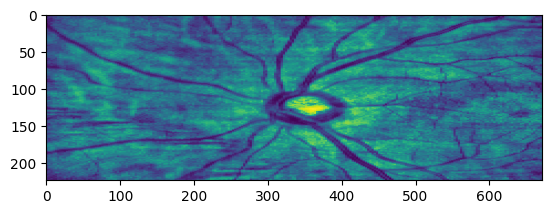

In [15]:
import matplotlib.pyplot as plt

plt.imshow(train_slo_rgb[1000])

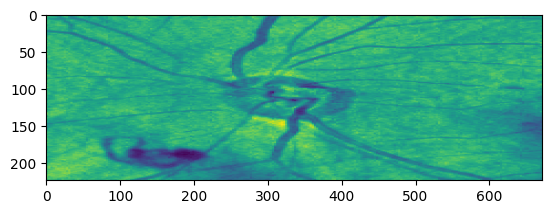

In [16]:
plt.imshow(train_oct_rgb[2000])

Normalizing pixel values in images  -- for input standardization to make input data format compatible

In [17]:
train_oct_normalized, test_oct_normalized = train_oct_rgb / 255.0, test_oct_rgb / 255.0
train_slo_normalized, test_slo_normalized = train_slo_rgb / 255.0, test_slo_rgb / 255.0

In [18]:
train_slo_rgb[0]

array([[25, 25, 25, ..., 11, 11, 11],
       [16, 16, 16, ...,  5,  5,  5],
       [21, 21, 21, ..., 11, 11, 11],
       ...,
       [22, 22, 22, ..., 10, 10, 10],
       [47, 47, 47, ...,  7,  7,  7],
       [25, 25, 25, ..., 14, 14, 14]], dtype=uint8)

In [19]:
train_slo_normalized[0]

array([[0.09803922, 0.09803922, 0.09803922, ..., 0.04313725, 0.04313725,
        0.04313725],
       [0.0627451 , 0.0627451 , 0.0627451 , ..., 0.01960784, 0.01960784,
        0.01960784],
       [0.08235294, 0.08235294, 0.08235294, ..., 0.04313725, 0.04313725,
        0.04313725],
       ...,
       [0.08627451, 0.08627451, 0.08627451, ..., 0.03921569, 0.03921569,
        0.03921569],
       [0.18431373, 0.18431373, 0.18431373, ..., 0.02745098, 0.02745098,
        0.02745098],
       [0.09803922, 0.09803922, 0.09803922, ..., 0.05490196, 0.05490196,
        0.05490196]])

In [20]:
#After Normalization
print("Train OCT Images shape: ", train_oct_normalized.shape)
print("Train SLO Images shape: ", train_slo_normalized.shape)
print("Test OCT Images shape: ", test_oct_normalized.shape)
print("Test SLO Images shape: ", test_slo_normalized.shape)

Train OCT Images shape:  (3000, 224, 672)
Train SLO Images shape:  (3000, 224, 672)
Test OCT Images shape:  (2000, 224, 672)
Test SLO Images shape:  (2000, 224, 672)


In [32]:
from PIL import Image  

# Function to resize  and expand images
def resize_images(images, target_size=(224, 224)):
    resized_images = []
    for img in images:
        img_resized = Image.fromarray(img).resize(target_size, Image.BILINEAR)  # Use Image.BILINEAR or Image.LANCZOS for resampling
        img_resized_array = np.array(img_resized)
        img_rgb = np.repeat(img_resized_array[..., np.newaxis], 3, axis=-1) 
        # img_resized_expanded = np.expand_dims(img_resized,3, axis=-1)
        #resized_images.append(np.array(img_resized))
        resized_images.append(np.array(img_rgb))
    return np.array(resized_images)


In [33]:
# Resize train and test images
train_oct_resized = resize_images(train_oct_normalized)
test_oct_resized = resize_images(test_oct_normalized)

train_slo_resized = resize_images(train_slo_normalized)
test_slo_resized = resize_images(test_slo_normalized)

# Check shapes after resizing
print(f'Train OCT resized shape: {train_oct_resized.shape}')
print(f'Train SLO resized shape: {train_slo_resized.shape}')
print(f'Test OCT resized shape: {test_oct_resized.shape}')
print(f'Test SLO resized shape: {test_slo_resized.shape}')

Train OCT resized shape: (3000, 224, 224, 3)
Train SLO resized shape: (3000, 224, 224, 3)
Test OCT resized shape: (2000, 224, 224, 3)
Test SLO resized shape: (2000, 224, 224, 3)


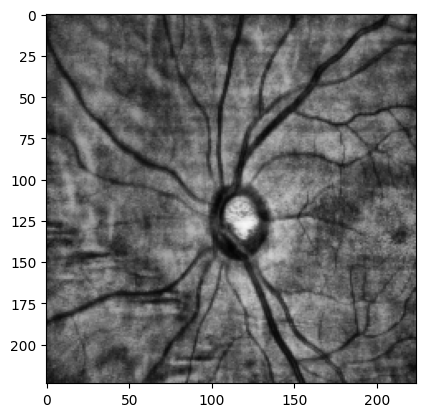

In [34]:

plt.imshow(train_slo_resized[1000])

In [35]:
train_slo_resized[0].shape

(224, 224, 3)

In [37]:
train_oct_resized[0]

array([[[0.7651961 , 0.7651961 , 0.7651961 ],
        [0.7180828 , 0.7180828 , 0.7180828 ],
        [0.6993464 , 0.6993464 , 0.6993464 ],
        ...,
        [0.65925926, 0.65925926, 0.65925926],
        [0.6017429 , 0.6017429 , 0.6017429 ],
        [0.5789216 , 0.5789216 , 0.5789216 ]],

       [[0.7558824 , 0.7558824 , 0.7558824 ],
        [0.7490196 , 0.7490196 , 0.7490196 ],
        [0.7424837 , 0.7424837 , 0.7424837 ],
        ...,
        [0.57080615, 0.57080615, 0.57080615],
        [0.53551203, 0.53551203, 0.53551203],
        [0.53970593, 0.53970593, 0.53970593]],

       [[0.725     , 0.725     , 0.725     ],
        [0.7485839 , 0.7485839 , 0.7485839 ],
        [0.7690632 , 0.7690632 , 0.7690632 ],
        ...,
        [0.5908497 , 0.5908497 , 0.5908497 ],
        [0.58126366, 0.58126366, 0.58126366],
        [0.5568628 , 0.5568628 , 0.5568628 ]],

       ...,

       [[0.73921573, 0.73921573, 0.73921573],
        [0.7285403 , 0.7285403 , 0.7285403 ],
        [0.7372549 , 0

Create Restnet Multimodal

In [104]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Concatenate, Dropout
from tensorflow.keras.models import Model

In [199]:
input_oct = Input(shape=(224, 224, 3))  # Shape is (224, 224, 3)
base_resnet_oct = ResNet50(include_top=False, weights='imagenet', input_tensor=input_oct, name= 'restnet_oct') #Adding name to avoid conflicts in layer names for oct and slo resnets
base_resnet_oct.trainable = False  # Freeze the pre-trained weights
for layer in base_resnet_oct.layers:
        layer.name = layer.name + "_oct"
        print(layer.name)
x1 = GlobalAveragePooling2D()(base_resnet_oct.output) #produces tensors

x1

input_layer_1_oct
conv1_pad_oct
conv1_conv_oct
conv1_bn_oct
conv1_relu_oct
pool1_pad_oct
pool1_pool_oct
conv2_block1_1_conv_oct
conv2_block1_1_bn_oct
conv2_block1_1_relu_oct
conv2_block1_2_conv_oct
conv2_block1_2_bn_oct
conv2_block1_2_relu_oct
conv2_block1_0_conv_oct
conv2_block1_3_conv_oct
conv2_block1_0_bn_oct
conv2_block1_3_bn_oct
conv2_block1_add_oct
conv2_block1_out_oct
conv2_block2_1_conv_oct
conv2_block2_1_bn_oct
conv2_block2_1_relu_oct
conv2_block2_2_conv_oct
conv2_block2_2_bn_oct
conv2_block2_2_relu_oct
conv2_block2_3_conv_oct
conv2_block2_3_bn_oct
conv2_block2_add_oct
conv2_block2_out_oct
conv2_block3_1_conv_oct
conv2_block3_1_bn_oct
conv2_block3_1_relu_oct
conv2_block3_2_conv_oct
conv2_block3_2_bn_oct
conv2_block3_2_relu_oct
conv2_block3_3_conv_oct
conv2_block3_3_bn_oct
conv2_block3_add_oct
conv2_block3_out_oct
conv3_block1_1_conv_oct
conv3_block1_1_bn_oct
conv3_block1_1_relu_oct
conv3_block1_2_conv_oct
conv3_block1_2_bn_oct
conv3_block1_2_relu_oct
conv3_block1_0_conv_oct
co

<KerasTensor shape=(None, 2048), dtype=float32, sparse=False, name=keras_tensor_9185>

In [200]:
input_slo = Input(shape=(224, 224, 3))
base_resnet_slo = ResNet50(include_top=False, weights='imagenet', input_tensor=input_slo, name='resnet_slo')
base_resnet_slo.trainable = False
for layer in base_resnet_slo.layers:
    layer.name = layer.name + "_slo"
    print(layer.name)
x2 = GlobalAveragePooling2D()(base_resnet_slo.output) #produces tensors
x2

input_layer_2_slo
conv1_pad_slo
conv1_conv_slo
conv1_bn_slo
conv1_relu_slo
pool1_pad_slo
pool1_pool_slo
conv2_block1_1_conv_slo
conv2_block1_1_bn_slo
conv2_block1_1_relu_slo
conv2_block1_2_conv_slo
conv2_block1_2_bn_slo
conv2_block1_2_relu_slo
conv2_block1_0_conv_slo
conv2_block1_3_conv_slo
conv2_block1_0_bn_slo
conv2_block1_3_bn_slo
conv2_block1_add_slo
conv2_block1_out_slo
conv2_block2_1_conv_slo
conv2_block2_1_bn_slo
conv2_block2_1_relu_slo
conv2_block2_2_conv_slo
conv2_block2_2_bn_slo
conv2_block2_2_relu_slo
conv2_block2_3_conv_slo
conv2_block2_3_bn_slo
conv2_block2_add_slo
conv2_block2_out_slo
conv2_block3_1_conv_slo
conv2_block3_1_bn_slo
conv2_block3_1_relu_slo
conv2_block3_2_conv_slo
conv2_block3_2_bn_slo
conv2_block3_2_relu_slo
conv2_block3_3_conv_slo
conv2_block3_3_bn_slo
conv2_block3_add_slo
conv2_block3_out_slo
conv3_block1_1_conv_slo
conv3_block1_1_bn_slo
conv3_block1_1_relu_slo
conv3_block1_2_conv_slo
conv3_block1_2_bn_slo
conv3_block1_2_relu_slo
conv3_block1_0_conv_slo
co

<KerasTensor shape=(None, 2048), dtype=float32, sparse=False, name=keras_tensor_9361>

In [201]:
combined = Concatenate()([x1, x2])
combined

<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_9362>

In [202]:
x = Dense(256, activation='relu')(combined)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid', name="output")(x)

In [203]:
model = Model(inputs=[input_oct,input_slo], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [204]:
model.summary()


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1_oct   │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2_slo   │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad_oct       │ (None, 230, 230,  │          0 │ input_layer_1_oc… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad_slo       │ (None, 230, 230,  │          0 │ input_layer_2_sl… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv_oct      │ (None, 112, 112,  │      9,472 │ conv1_pad_oct[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv_slo      │ (None, 112, 112,  │      9,472 │ conv1_pad_slo[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn_oct        │ (None, 112, 112,  │        256 │ conv1_conv_oct[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn_slo        │ (None, 112, 112,  │        256 │ conv1_conv_slo[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu_oct      │ (None, 112, 112,  │          0 │ conv1_bn_oct[0][… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu_slo      │ (None, 112, 112,  │          0 │ conv1_bn_slo[0][… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad_oct       │ (None, 114, 114,  │          0 │ conv1_relu_oct[0… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad_slo       │ (None, 114, 114,  │          0 │ conv1_relu_slo[0… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool_oct      │ (None, 56, 56,    │          0 │ pool1_pad_oct[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool_slo      │ (None, 56, 56,    │          0 │ pool1_pad_slo[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_con… │ (None, 56, 56,    │      4,160 │ pool1_pool_oct[0… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_con… │ (None, 56, 56,    │      4,160 │ pool1_pool_slo[0… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn_… │ (None, 56, 56,    │        256 │ conv2_block1_1_c

 Total params: 48,224,513 (183.96 MB)

 Trainable params: 1,049,089 (4.00 MB)

 Non-trainable params: 47,175,424 (179.96 MB)

Model Training

In [205]:
print(train_oct_resized.shape)  # Should be (num_samples, 224, 224, 3)
print(train_slo_resized.shape)  # Should be (num_samples, 224, 224, 3)
print(train_glaucoma_labels.shape)  # Should be (num_samples, )

print(test_oct_resized.shape)
print(test_slo_resized.shape)
print(test_glaucoma_labels.shape)

np.count_nonzero(train_glaucoma_labels == 0)

(3000, 224, 224, 3)
(3000, 224, 224, 3)
(3000, 1)
(2000, 224, 224, 3)
(2000, 224, 224, 3)
(2000, 1)


1683

In [155]:
train_glaucoma_labels = train_glaucoma_labels.reshape(-1, 1)
test_glaucoma_labels = test_glaucoma_labels.reshape(-1, 1)


In [183]:
test_glaucoma_labels.shape

(2000, 1)

In [149]:
print(test_oct_resized[0])
print(test_slo_resized[0])
print(test_glaucoma_labels[0])


[[[0.6509804  0.6509804  0.6509804 ]
  [0.675817   0.675817   0.675817  ]
  [0.6875817  0.6875817  0.6875817 ]
  ...
  [0.62047935 0.62047935 0.62047935]
  [0.60784316 0.60784316 0.60784316]
  [0.5740196  0.5740196  0.5740196 ]]

 [[0.66764706 0.66764706 0.66764706]
  [0.6727669  0.6727669  0.6727669 ]
  [0.6671024  0.6671024  0.6671024 ]
  ...
  [0.6139434  0.6139434  0.6139434 ]
  [0.6348584  0.6348584  0.6348584 ]
  [0.62892157 0.62892157 0.62892157]]

 [[0.625      0.625      0.625     ]
  [0.65708065 0.65708065 0.65708065]
  [0.6562092  0.6562092  0.6562092 ]
  ...
  [0.5982571  0.5982571  0.5982571 ]
  [0.590414   0.590414   0.590414  ]
  [0.57500005 0.57500005 0.57500005]]

 ...

 [[0.579902   0.579902   0.579902  ]
  [0.5782135  0.5782135  0.5782135 ]
  [0.58257085 0.58257085 0.58257085]
  ...
  [0.72200435 0.72200435 0.72200435]
  [0.7416122  0.7416122  0.7416122 ]
  [0.69460785 0.69460785 0.69460785]]

 [[0.5416667  0.5416667  0.5416667 ]
  [0.54640526 0.54640526 0.54640526]


In [216]:
training = model.fit([train_oct_resized,train_slo_resized],train_glaucoma_labels, validation_data=([test_oct_resized,test_slo_resized],test_glaucoma_labels), epochs = 50 ,batch_size = 32)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.5611 - loss: 0.6857 - val_accuracy: 0.5565 - val_loss: 0.6868
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.5618 - loss: 0.6855 - val_accuracy: 0.5565 - val_loss: 0.6868
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 453s 5s/step - accuracy: 0.5753 - loss: 0.6821 - val_accuracy: 0.5565 - val_loss: 0.6868
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 454s 5s/step - accuracy: 0.5623 - loss: 0.6854 - val_accuracy: 0.5565 - val_loss: 0.6868
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 455s 5s/step - accuracy: 0.5591 - loss: 0.6862 - val_accuracy: 0.5565 - val_loss: 0.6868
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 458s 5s/step - accuracy: 0.5625 - loss: 0.6853 - val_accuracy: 0.5565 - val_loss: 0.6868
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 315s 3s/step - accuracy: 0.5622 - loss: 0.6854 - val_accuracy: 0.5565 - val_loss: 0.6868
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.5532 - loss: 0.6876 - val_accuracy: 0.5565 - v

In [217]:
test_loss, test_accuracy = model.evaluate([test_oct_resized, test_slo_resized], test_glaucoma_labels)
print(f'Test Accuracy: {test_accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5519 - loss: 0.6879
Test Accuracy: 0.5565000176429749


In [209]:
from sklearn.metrics import roc_auc_score

In [218]:
y_pred_prob = model.predict([test_oct_resized,test_slo_resized]) 

63/63 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step


In [219]:
overall_auc = roc_auc_score(test_glaucoma_labels, y_pred_prob)
print(f'Overall AUC: {overall_auc:.4f}')

Overall AUC: 0.5000


In [220]:
races = np.unique(test_races)
races

array([0, 1, 2])

In [221]:
race_auc_scores = {}

In [270]:
for r in races:
    race_indices = np.where(test_races == r)
    
    # Extract test labels and predicted probabilities for the current race
    race_labels = test_glaucoma_labels[race_indices]
    race_pred_prob = y_pred_prob[race_indices]
    
    # Calculate AUC for the current race
    race_auc = roc_auc_score(race_labels, race_pred_prob)
    race_auc_scores[r] = race_auc
    print(f'AUC for {r}: {race_auc:.4f}')

AUC for 0: 0.5000
AUC for 1: 0.5000
AUC for 2: 0.5000


Check races label representations

In [226]:
import pandas as pd

In [227]:
metadata = pd.read_csv('C:\\Rakshya\\ULL\\First Semester\\Data Mining\\fairdomain-20241031T021302Z-001\\fairdomain\\data_summary.csv')

In [246]:
testing_data = metadata[metadata['use'] == 'testing'].copy()

In [247]:
print(testing_data['race'])

3000    white
3001    black
3002    asian
3003    white
3004    white
        ...  
4995    white
4996    white
4997    white
4998    white
4999    black
Name: race, Length: 2000, dtype: object


In [248]:
test_races

array([2, 1, 0, ..., 2, 2, 1])

In [254]:
testing_data['race_label'] = np.array(test_races)

In [255]:
testing_data

,filename,age,gender,race,ethnicity,language,maritalstatus,md,glaucoma,use,race_label
3000,data_08001.npz,68.00,female,white,non-hispanic,english,married or partnered,1.28,no,testing,2
3001,data_08002.npz,50.07,male,black,hispanic,spanish,married or partnered,-0.73,no,testing,1
3002,data_08003.npz,77.57,female,asian,non-hispanic,other,married or partnered,0.11,no,testing,0
3003,data_08004.npz,56.00,female,white,non-hispanic,english,married or partnered,-0.14,no,testing,2
3004,data_08005.npz,57.83,female,white,non-hispanic,english,single,0.05,no,testing,2
...,...,...,...,...,...,...,...,...,...,...,...
4995,data_09996.npz,59.12,female,white,non-hispanic,english,married or partnered,0.16,no,testing,2
4996,data_09997.npz,62.00,female,white,non-hispanic,english,married or partnered,0.41,no,testing,2
4997,data_09998.npz,77.10,female,white,non-hispanic,english,widowed,-9.54,yes,testing,2
4998,data_09999.npz,44.76,female,white,non-hispanic,english,married or partnered,0.74,no,testing,2
